In [1]:
from src.dinov2_custom import Segmenter, Sparse_Matcher, DINOv2

import glob
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

c:\Users\firdavs\Documents\ARCL\DINOv2_Sparse_Matching\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\firdavs\Documents\ARCL\DINOv2_Sparse_Matching\.venv\lib\site-packages\mobile_sam\modeling\tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
c:\Users\firdavs\Documents\ARCL\DINOv2_Sparse_Matching\.venv\lib\site-packages\mobile_sam\modeling\tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expect

In [3]:
def get_image(path: str) -> np.ndarray:
    image = cv2.cvtColor(cv2.imread(path, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    return image

def get_images(dir: str) -> dict[str, np.ndarray]:
    pattern = os.path.join(dir, '*.png')
    file_list = glob.glob(pattern)
    
    images = {}
    for file_path in file_list:
        image = get_image(file_path)
        
        images[file_path] = image
    
    return images

def generate_masks_and_overlays(segmenter: Segmenter, images: dict[str, np.ndarray]) -> (dict, dict):
    masks = {}
    overlays = {}
    
    for file_path in tqdm(images.keys()):
        image = images[file_path]
        
        generated_masks = segmenter.generate_masks(image)
        overlay = segmenter.prepare_masks(generated_masks)
        
        masks[file_path] = generated_masks
        overlays[file_path] = overlay
    
    return masks, overlays

def visualize(overlays: list[np.ndarray], titles: list[str], image: np.ndarray, figsize: tuple[int] = (15, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(1, 1 + len(overlays), 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    
    subplot_idx = 2
    for i, overlay in enumerate(overlays):
        plt.subplot(1, 1 + len(overlays), subplot_idx)
        plt.imshow(overlay)
        plt.title(titles[i])
        plt.axis('off')

        subplot_idx += 1
        
    plt.show()
        

In [4]:
segmenter_mobile = Segmenter(model_size="mobile")
segmenter_small  = Segmenter(model_size="small")
segmenter_medium = Segmenter(model_size="medium")
segmenter_large  = Segmenter(model_size="large")

directory_path = 'tests/sim_7_subframes'

images = get_images(directory_path)

masks_mobile, overlays_mobile = generate_masks_and_overlays(segmenter_mobile, images)
masks_small, overlays_small   = generate_masks_and_overlays(segmenter_small, images)
masks_medium, overlays_medium = generate_masks_and_overlays(segmenter_medium, images)
masks_large, overlays_large   = generate_masks_and_overlays(segmenter_large, images)

100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


tests/sim_7_subframes\frame_0482.png


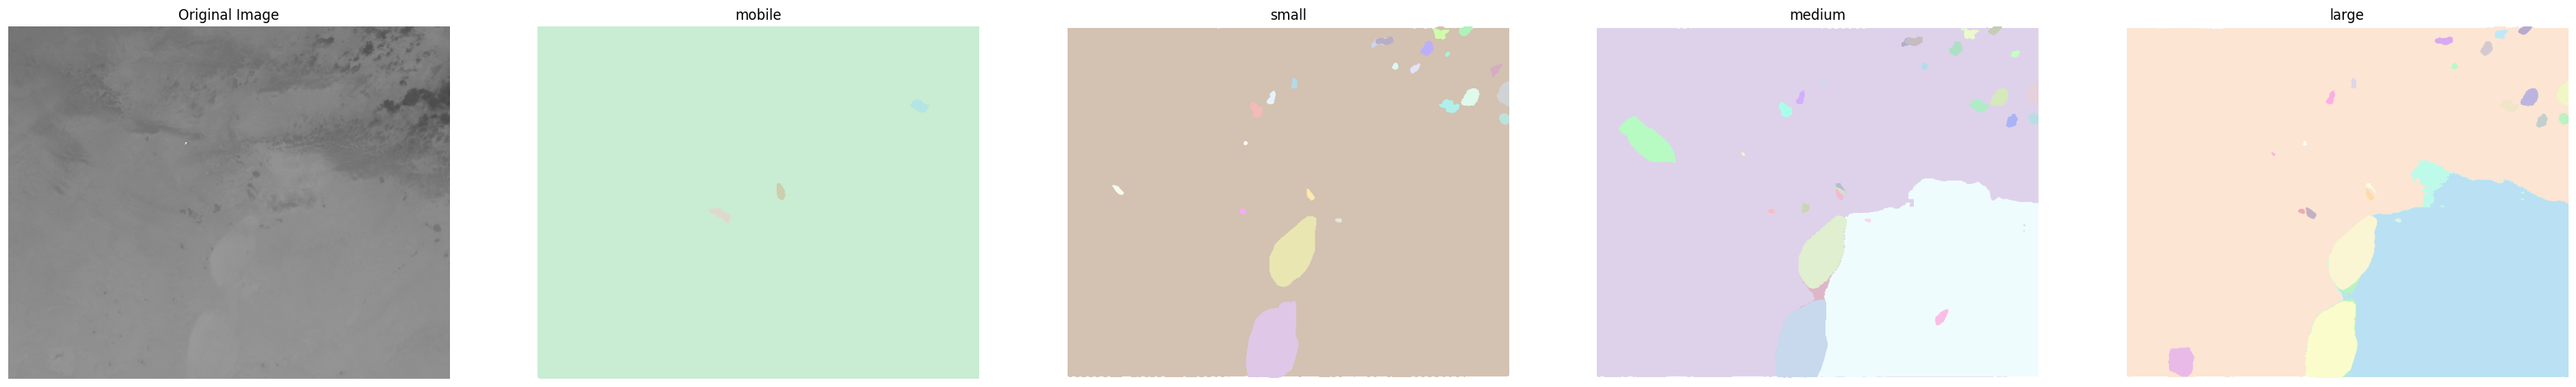

tests/sim_7_subframes\frame_0483.png


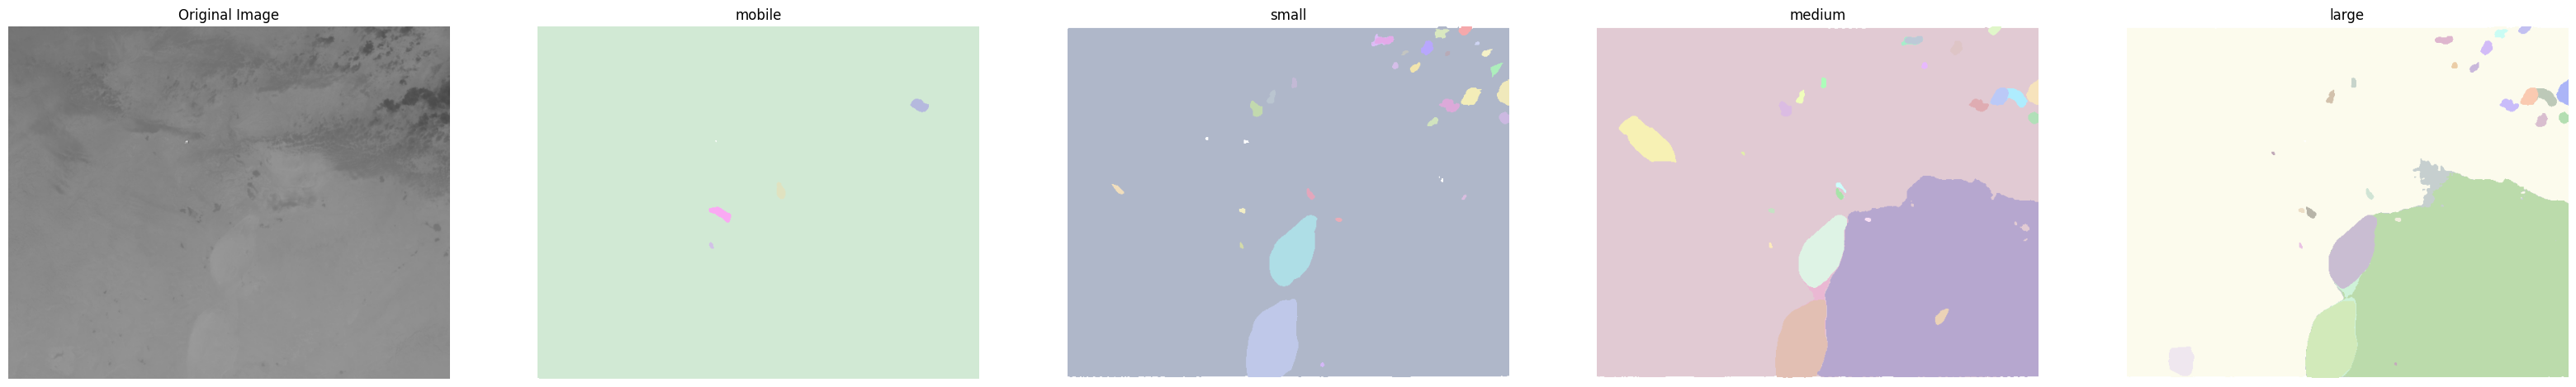

tests/sim_7_subframes\frame_0484.png


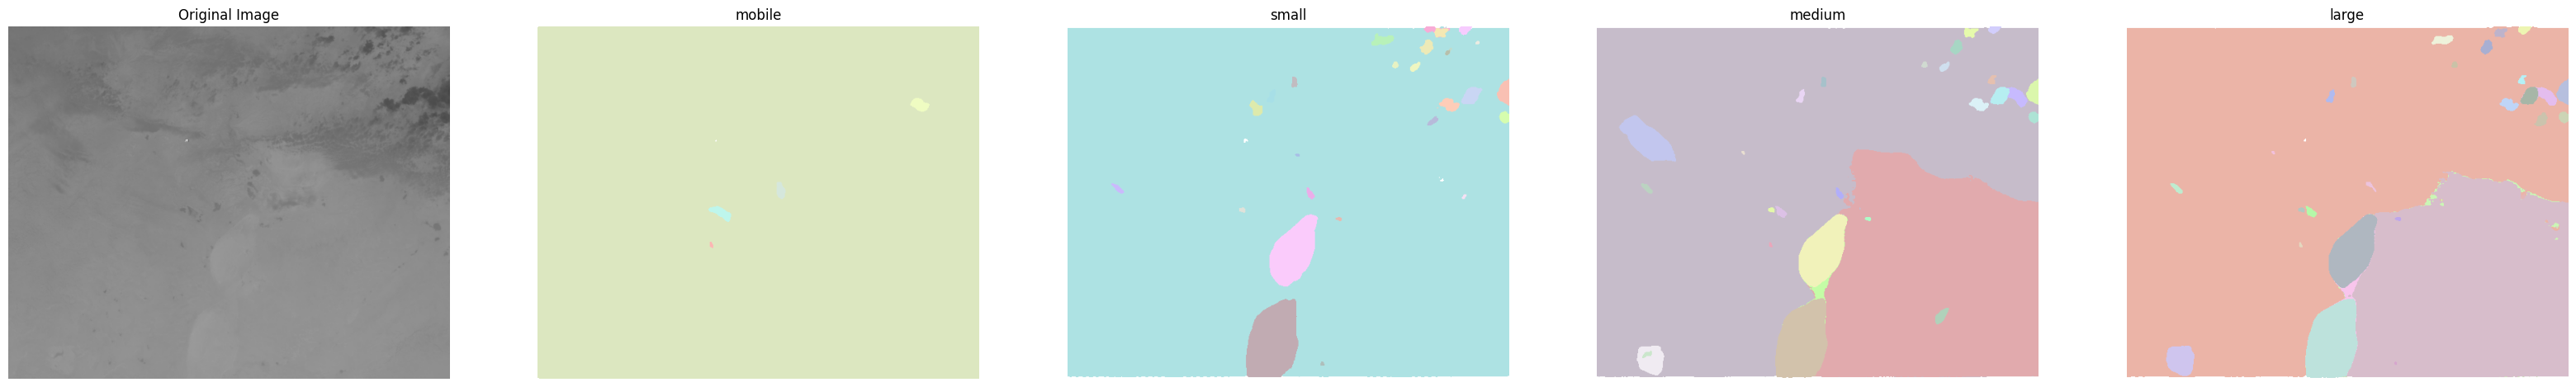

tests/sim_7_subframes\frame_0485.png


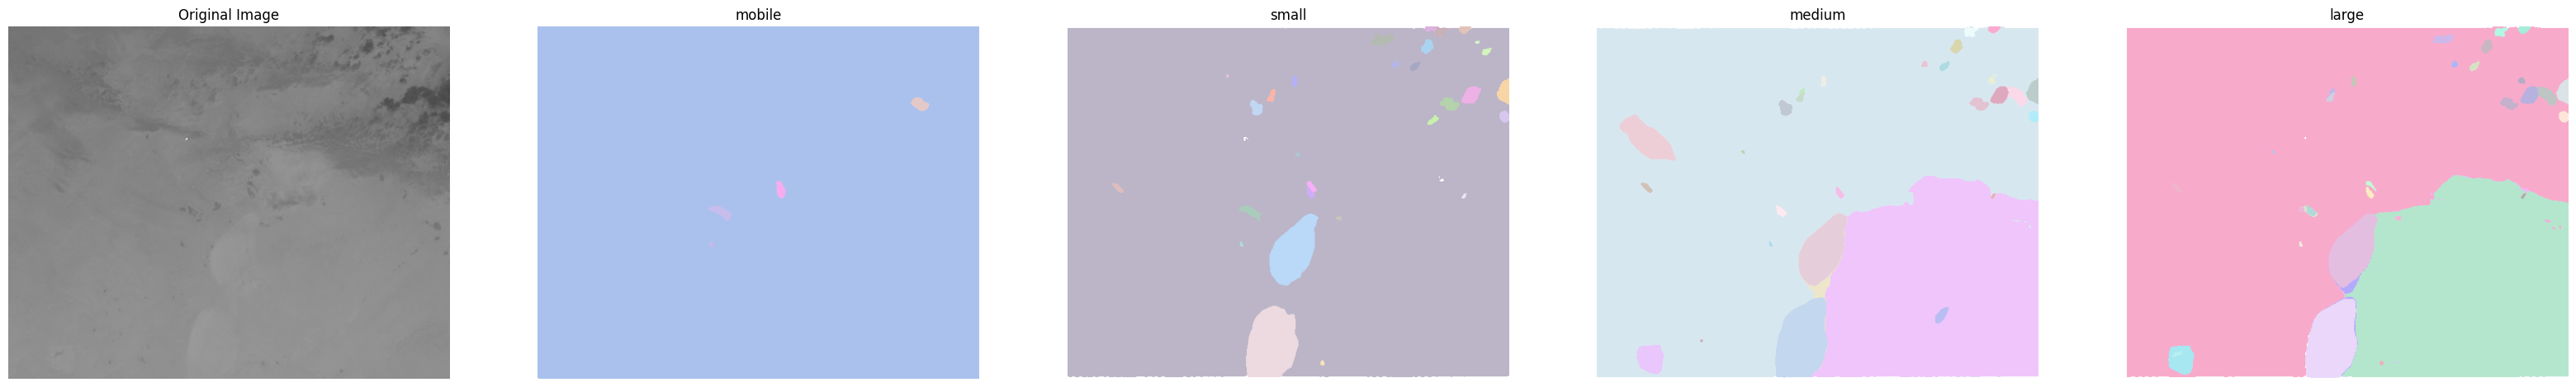

tests/sim_7_subframes\frame_0486.png


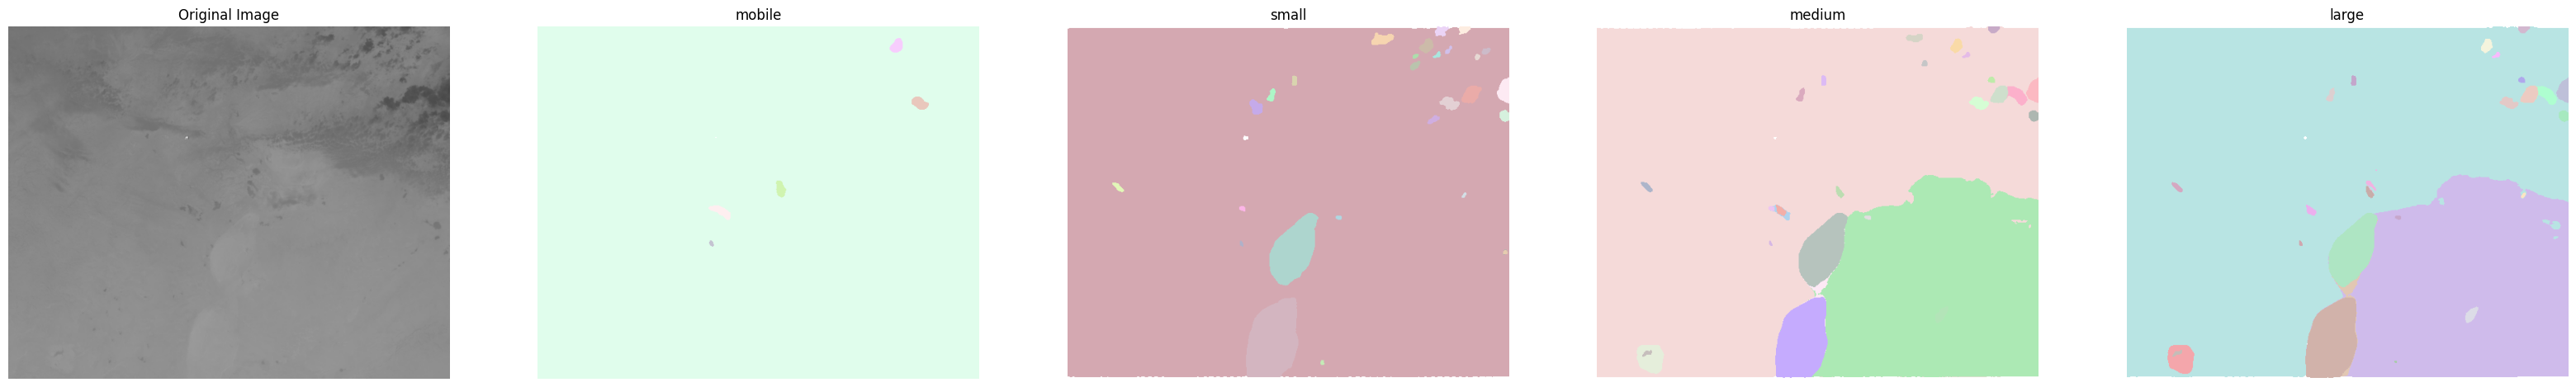

tests/sim_7_subframes\frame_0487.png


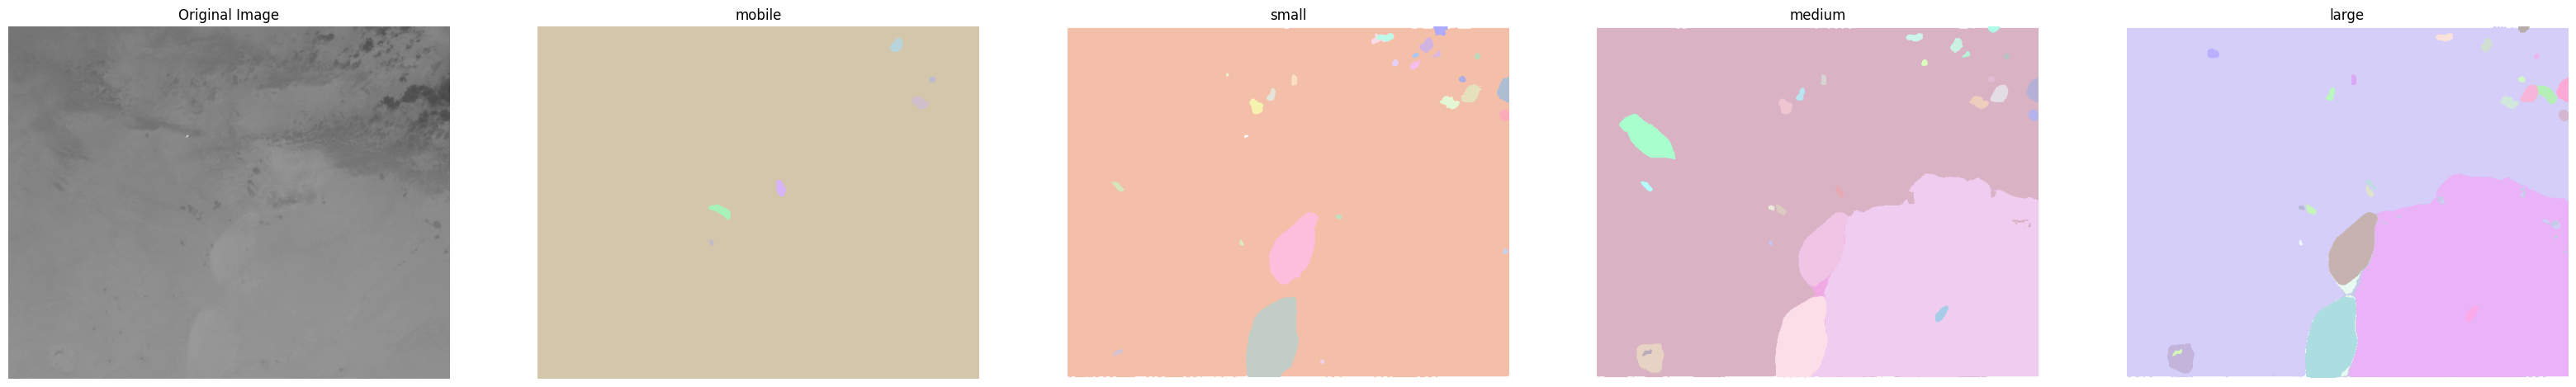

tests/sim_7_subframes\frame_0488.png


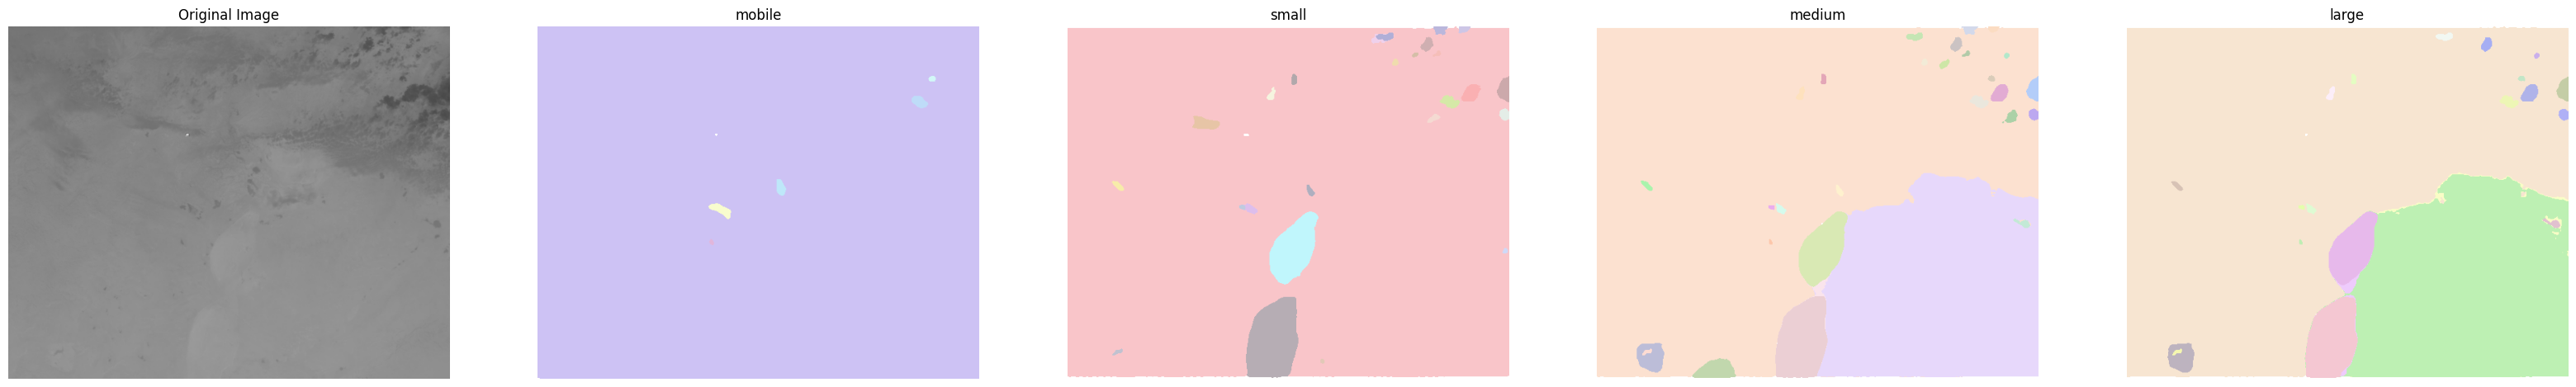

tests/sim_7_subframes\frame_0489.png


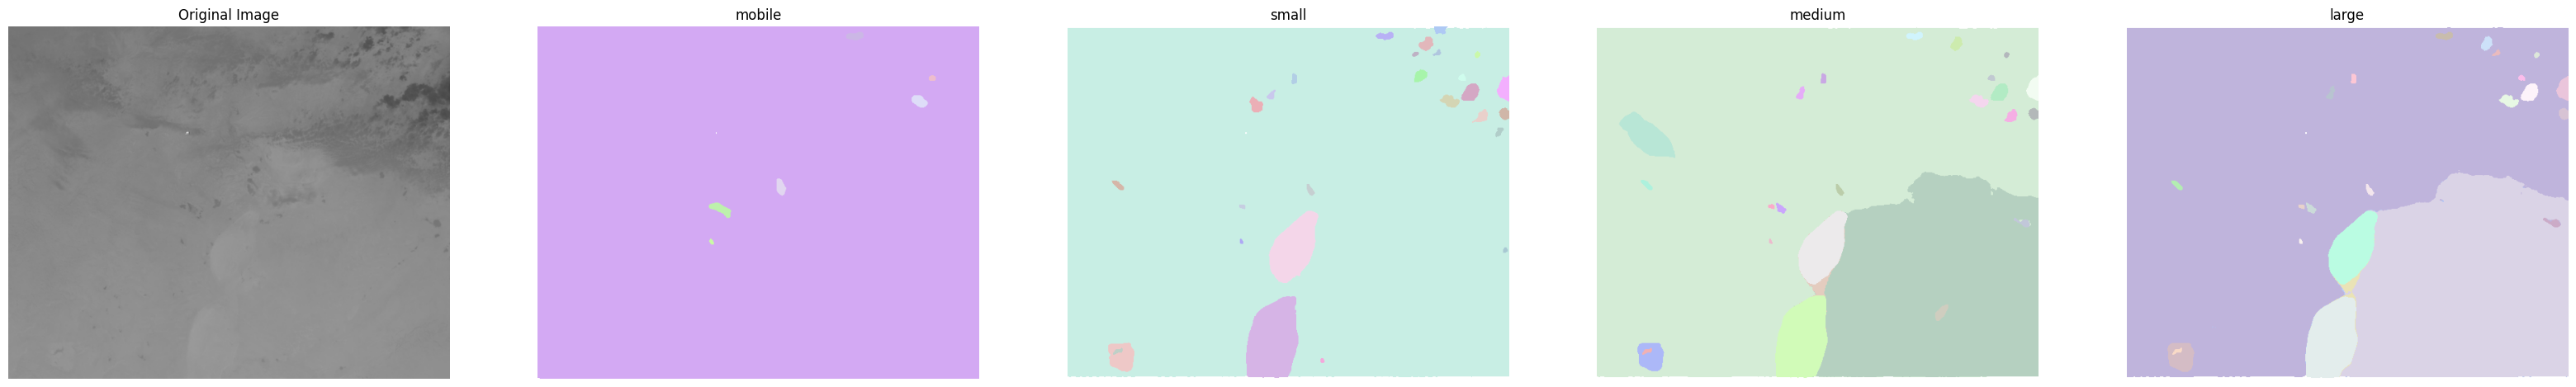

tests/sim_7_subframes\frame_0490.png


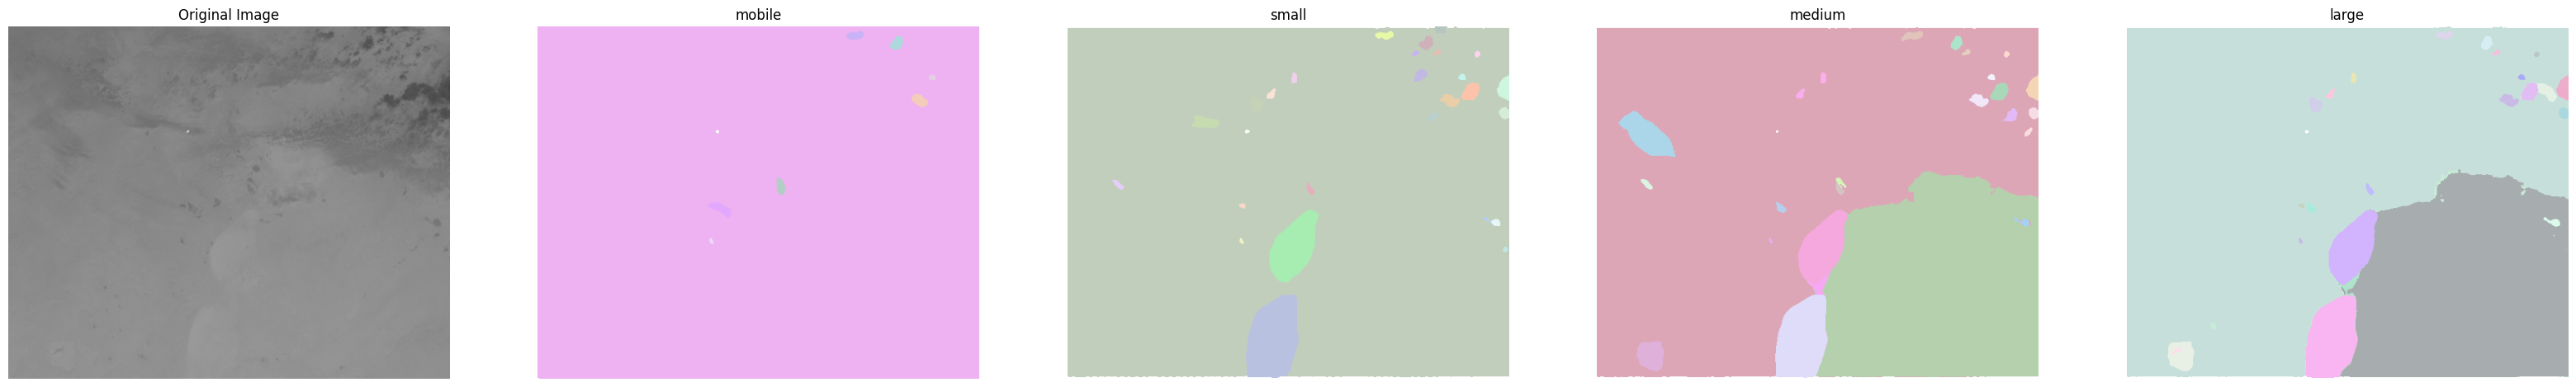

tests/sim_7_subframes\frame_0491.png


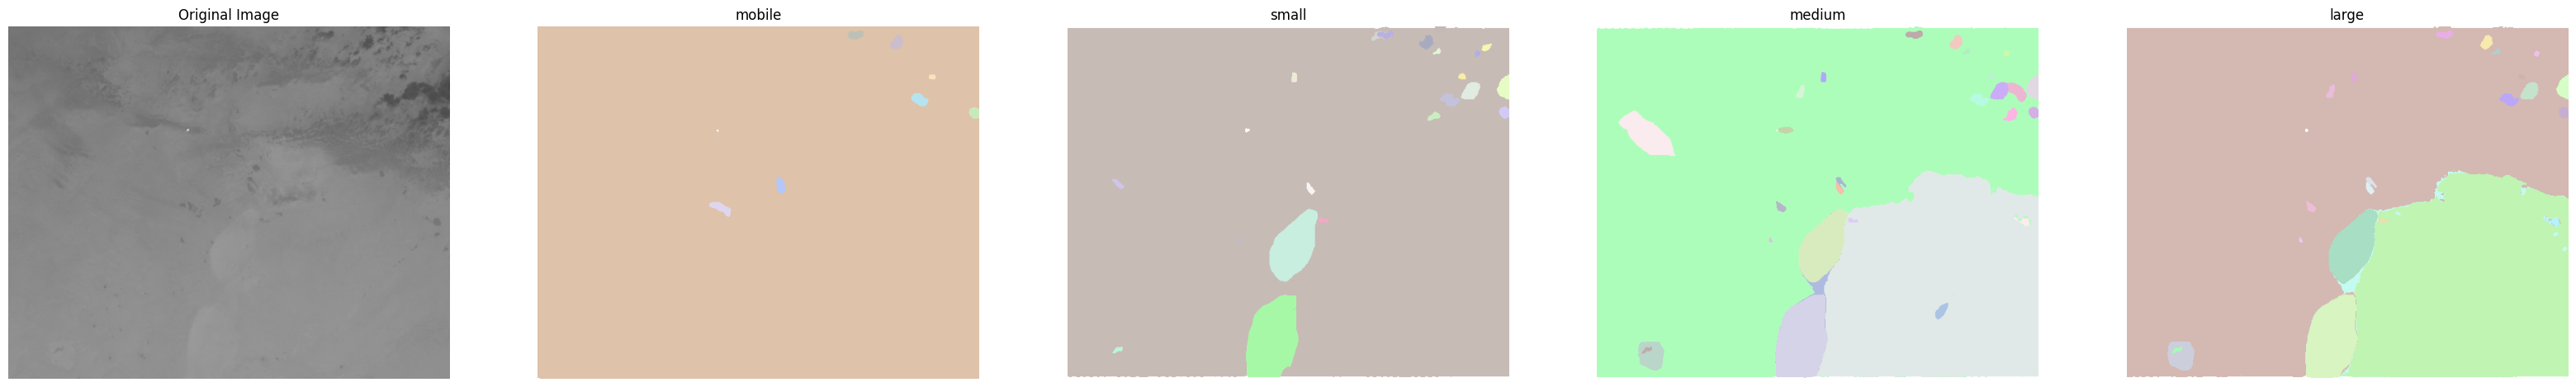

In [7]:
visualizing = \
    {
        'mobile': True,
        'small': True,
        'medium': True,
        'large': True
    }

for file_path in images.keys():
    print(file_path)
    
    overlays = []
    for model_size, is_visualizing in visualizing.items():
        if is_visualizing:
            if model_size == 'mobile':
                overlays.append(overlays_mobile[file_path])
            elif model_size == 'small':
                overlays.append(overlays_small[file_path])
            elif model_size == 'medium':
                overlays.append(overlays_medium[file_path])
            elif model_size == 'large':
                overlays.append(overlays_large[file_path])
            
    
    visualize(overlays, 
              list(visualizing.keys()),
              images[file_path], 
              figsize=(40, 10))

In [10]:
segmenter_mobile = Segmenter(model_size="mobile")
segmenter_small  = Segmenter(model_size="small")
segmenter_medium = Segmenter(model_size="medium")
segmenter_large  = Segmenter(model_size="large")

directory_path = 'tests/sim_12_subframes'

images = get_images(directory_path)

masks_mobile, overlays_mobile = generate_masks_and_overlays(segmenter_mobile, images)
masks_small, overlays_small   = generate_masks_and_overlays(segmenter_small, images)
masks_medium, overlays_medium = generate_masks_and_overlays(segmenter_medium, images)
masks_large, overlays_large   = generate_masks_and_overlays(segmenter_large, images)

100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


tests/sim_12_subframes\frame_0558.png


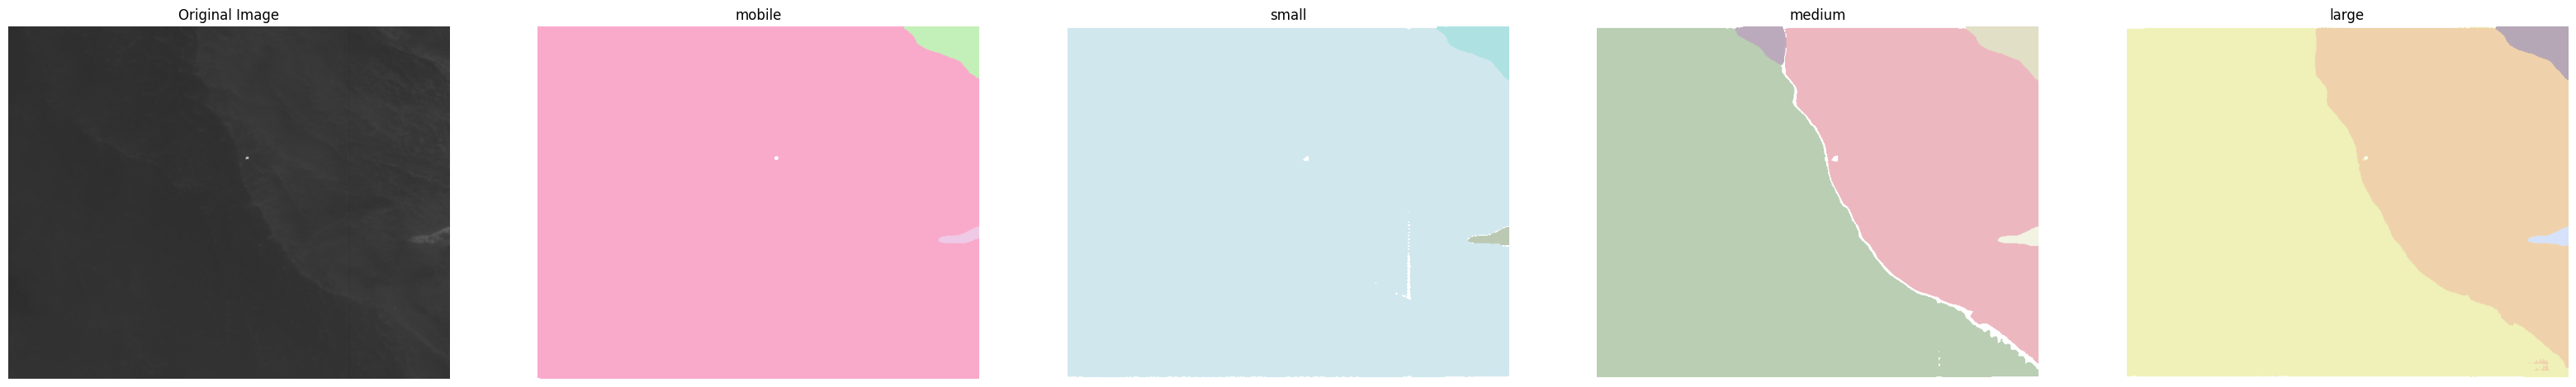

tests/sim_12_subframes\frame_0559.png


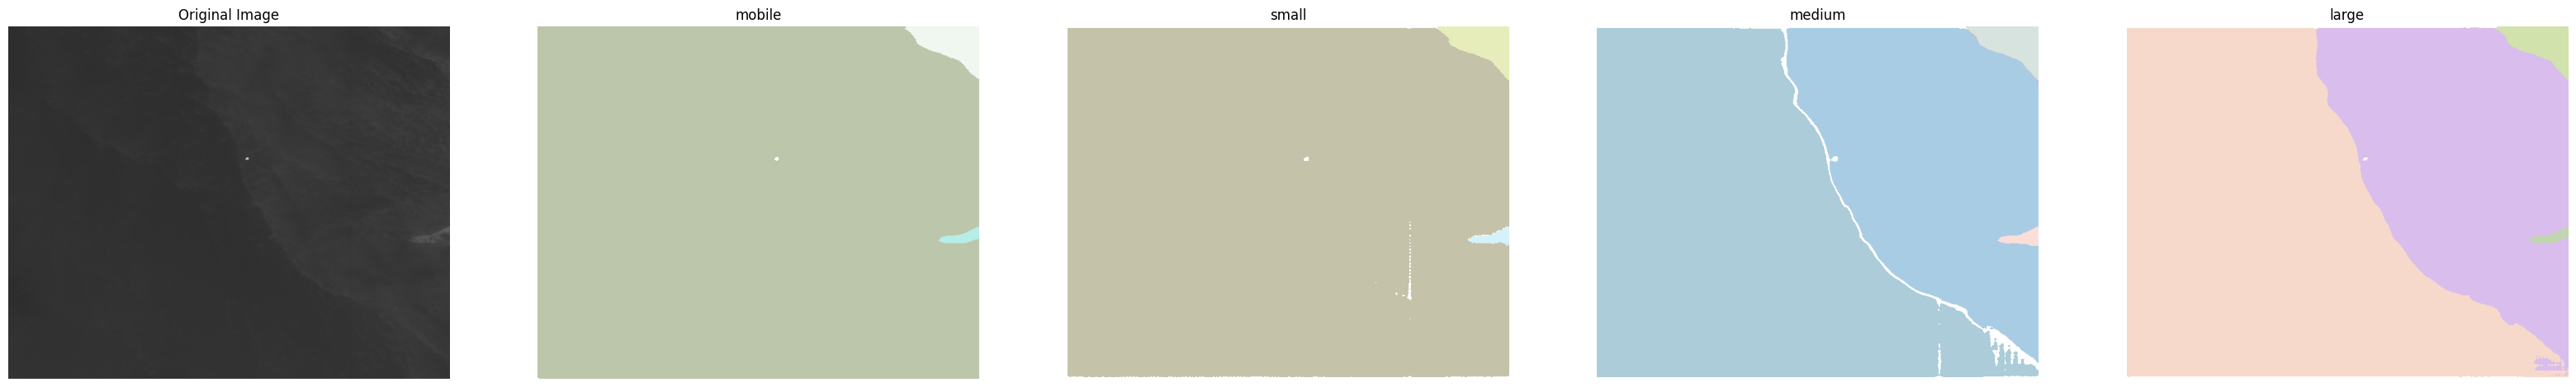

tests/sim_12_subframes\frame_0560.png


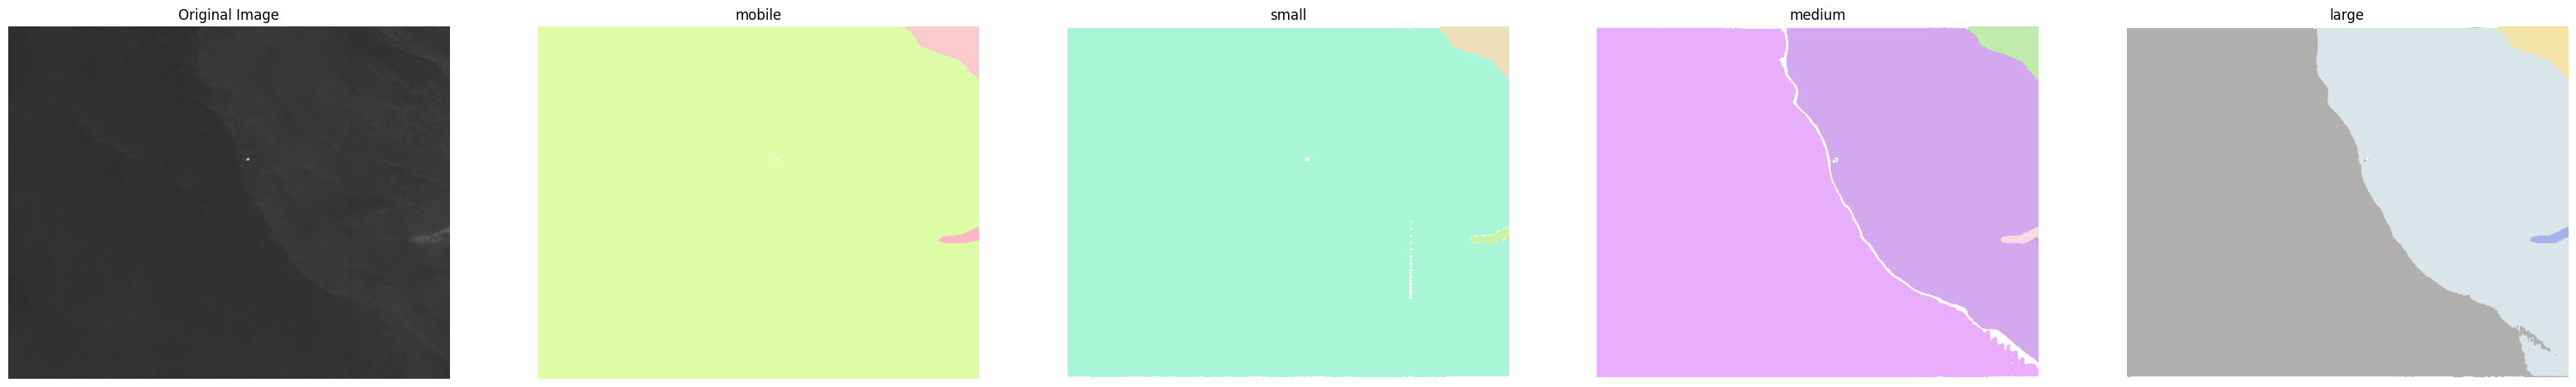

tests/sim_12_subframes\frame_0561.png


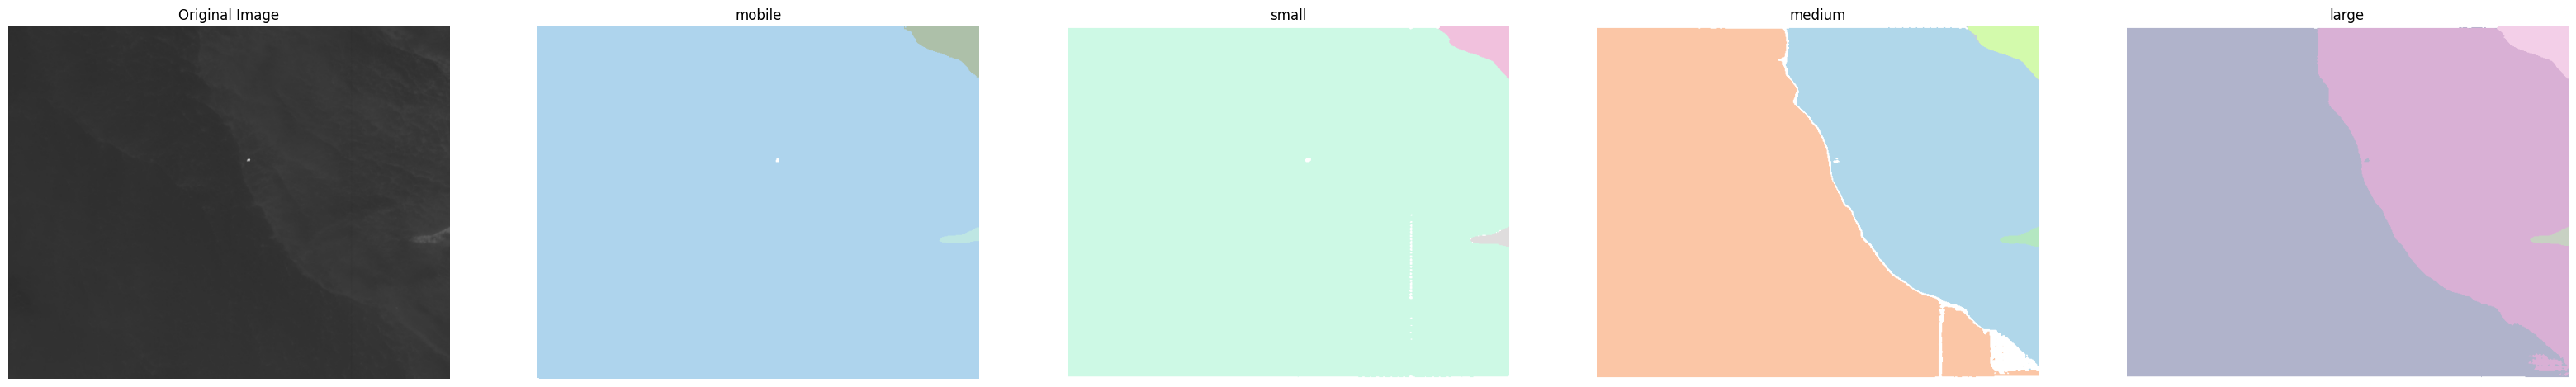

tests/sim_12_subframes\frame_0562.png


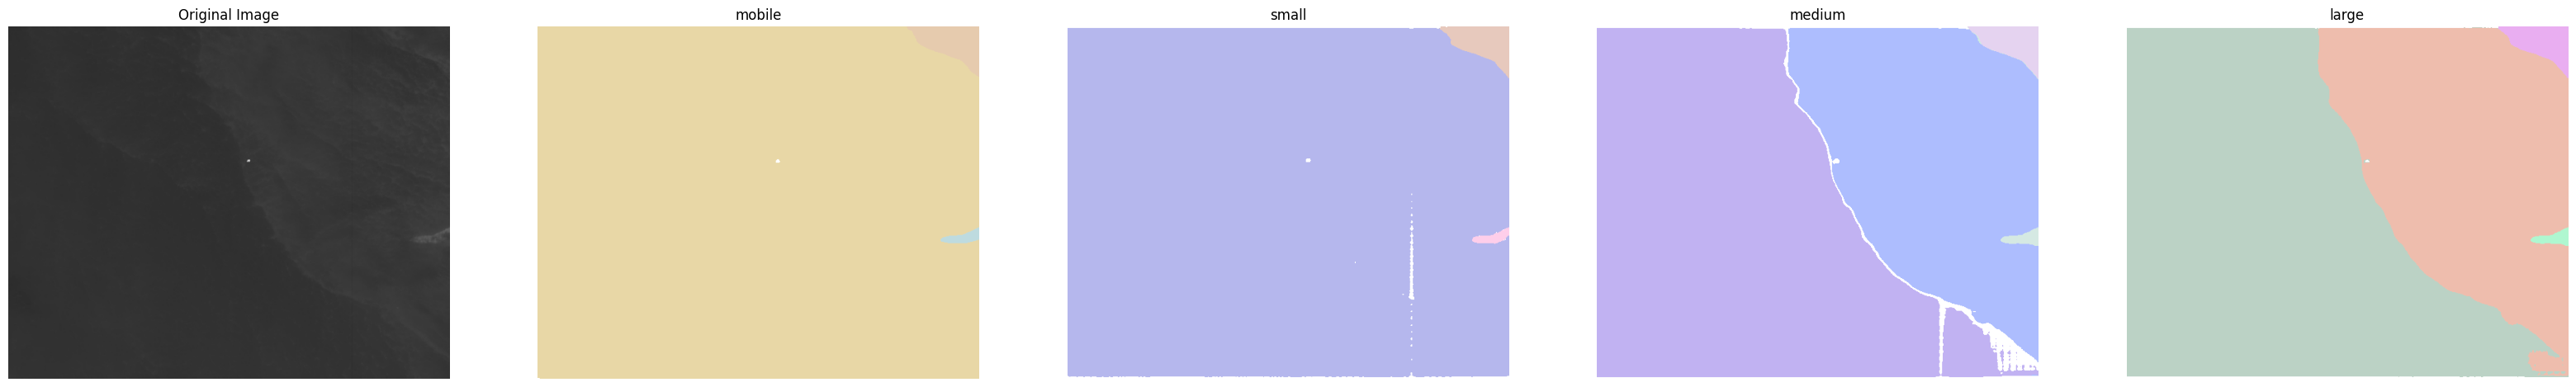

tests/sim_12_subframes\frame_0563.png


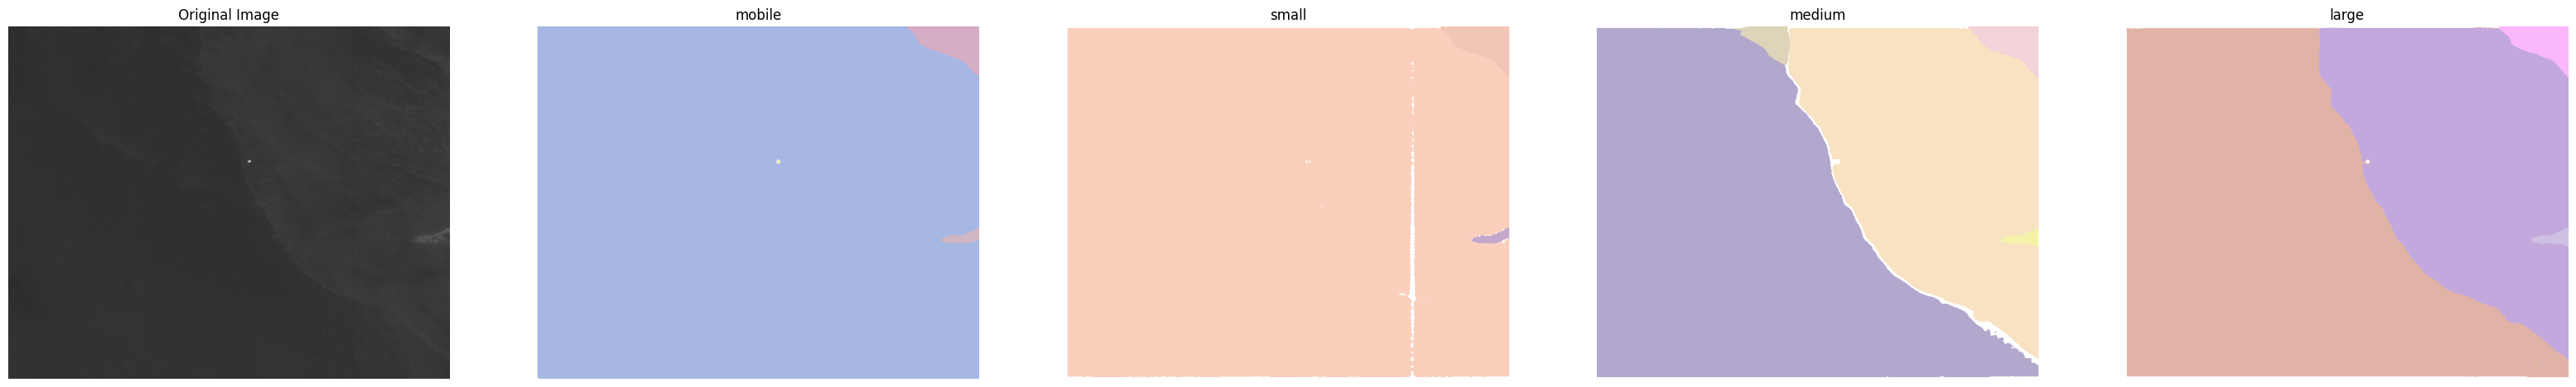

tests/sim_12_subframes\frame_0564.png


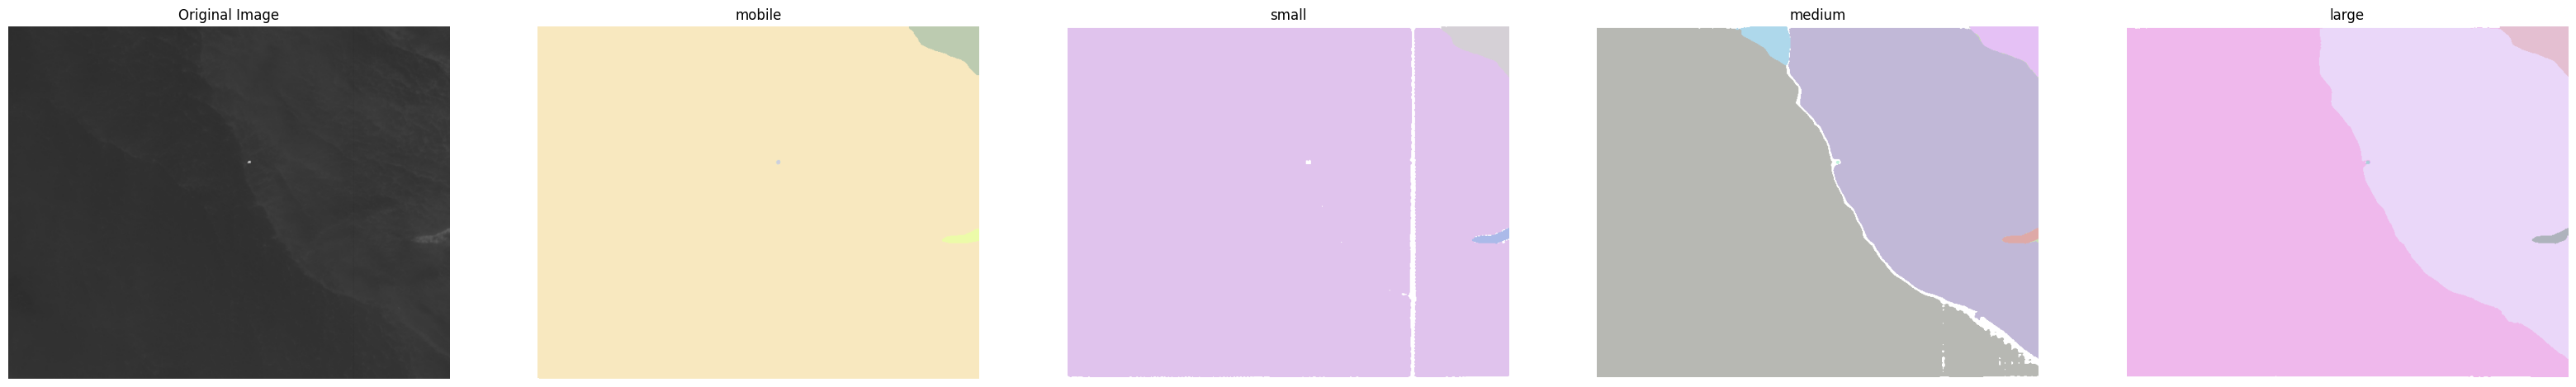

tests/sim_12_subframes\frame_0565.png


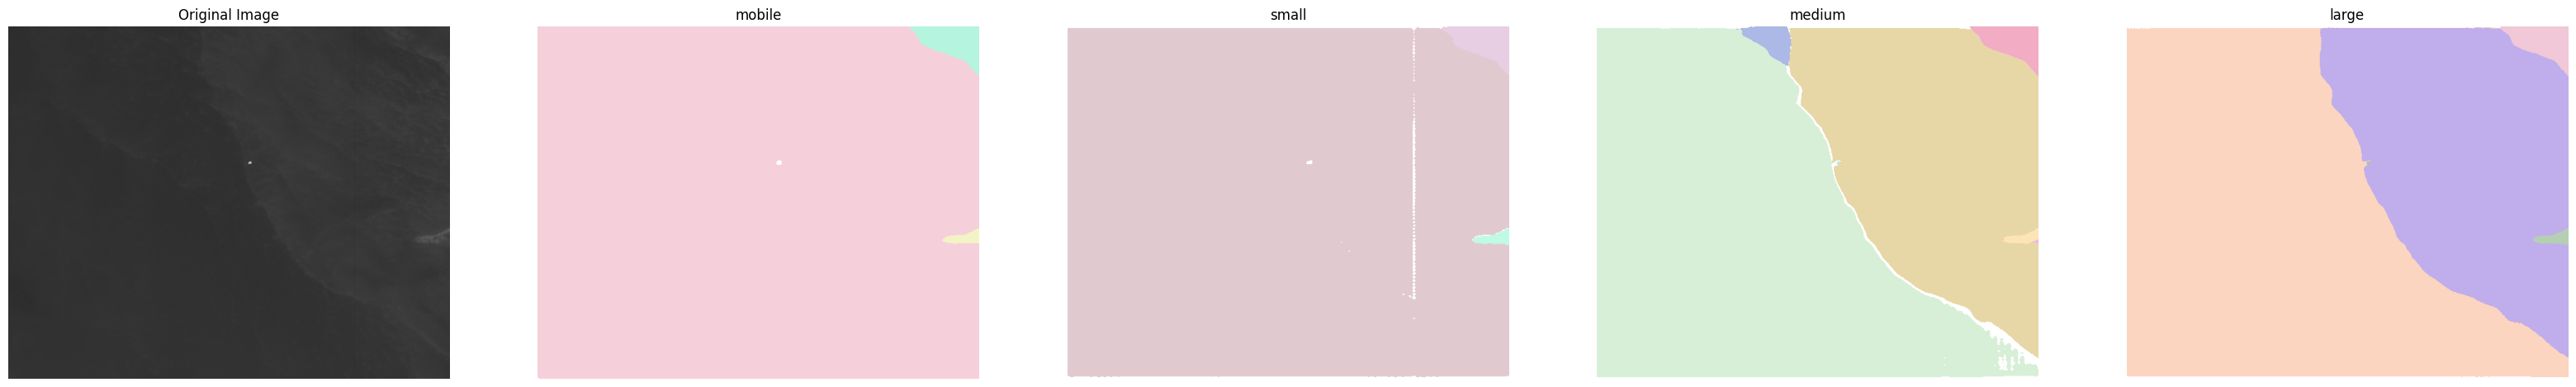

tests/sim_12_subframes\frame_0566.png


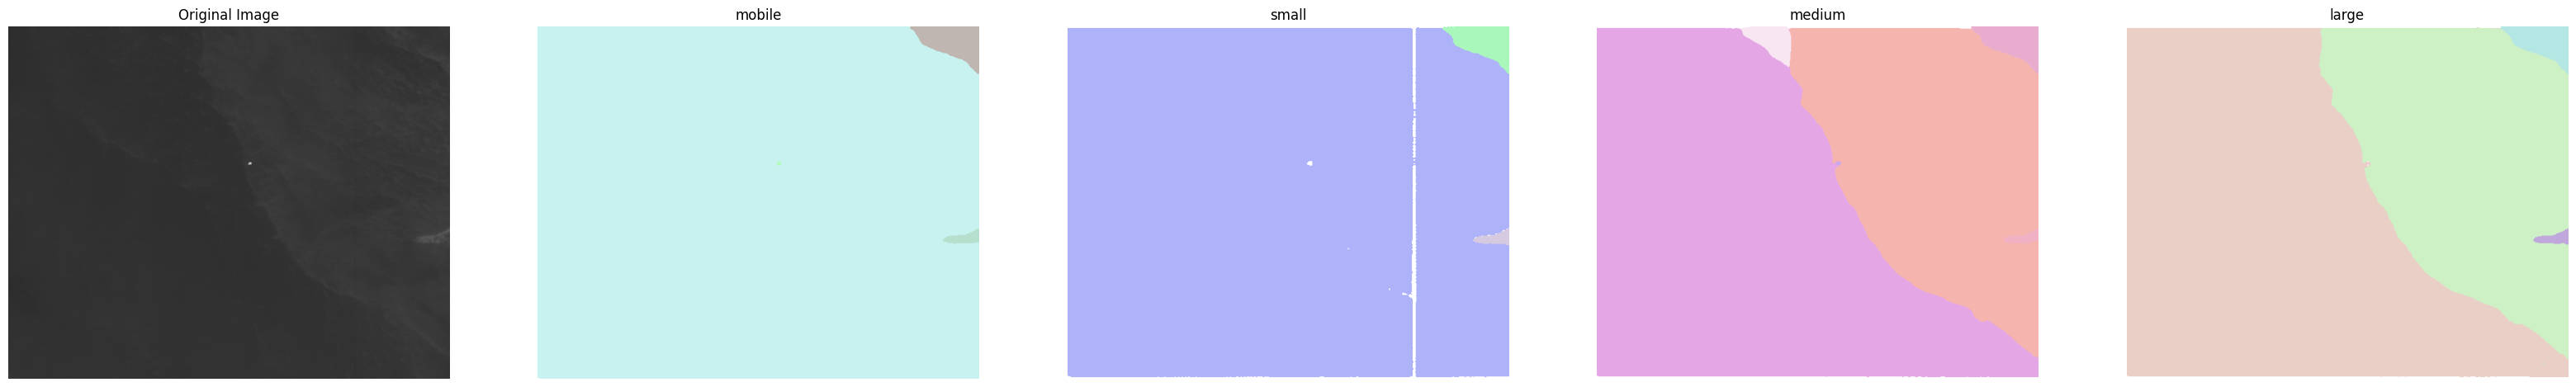

tests/sim_12_subframes\frame_0567.png


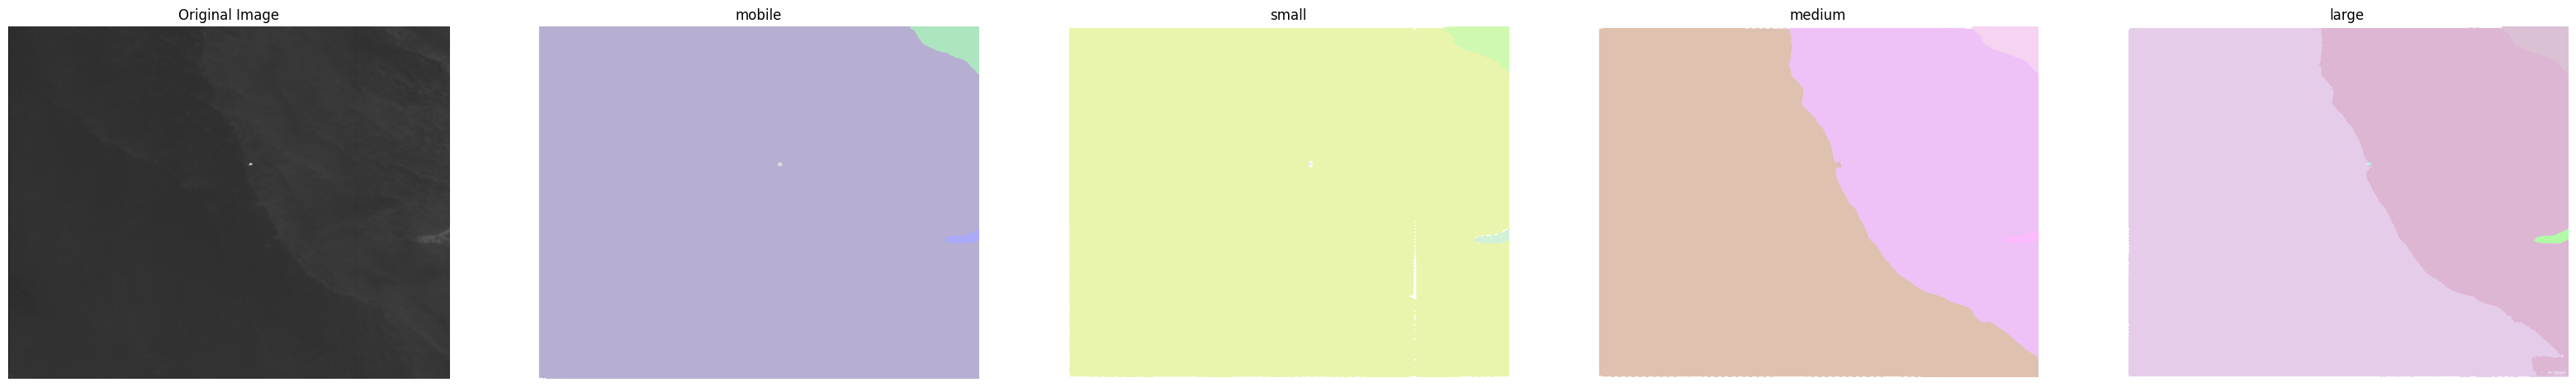

In [11]:
visualizing = \
    {
        'mobile': True,
        'small': True,
        'medium': True,
        'large': True
    }

for file_path in images.keys():
    print(file_path)
    
    overlays = []
    for model_size, is_visualizing in visualizing.items():
        if is_visualizing:
            if model_size == 'mobile':
                overlays.append(overlays_mobile[file_path])
            elif model_size == 'small':
                overlays.append(overlays_small[file_path])
            elif model_size == 'medium':
                overlays.append(overlays_medium[file_path])
            elif model_size == 'large':
                overlays.append(overlays_large[file_path])
            
    
    visualize(overlays, 
              list(visualizing.keys()),
              images[file_path], 
              figsize=(40, 10))

In [12]:
segmenter_mobile = Segmenter(model_size="mobile")
segmenter_small  = Segmenter(model_size="small")
segmenter_medium = Segmenter(model_size="medium")
segmenter_large  = Segmenter(model_size="large")

directory_path = 'tests/sim_15_subframes'

images = get_images(directory_path)

masks_mobile, overlays_mobile = generate_masks_and_overlays(segmenter_mobile, images)
masks_small, overlays_small   = generate_masks_and_overlays(segmenter_small, images)
masks_medium, overlays_medium = generate_masks_and_overlays(segmenter_medium, images)
masks_large, overlays_large   = generate_masks_and_overlays(segmenter_large, images)

100%|██████████| 10/10 [00:23<00:00,  2.37s/it]


tests/sim_15_subframes\frame_0511.png


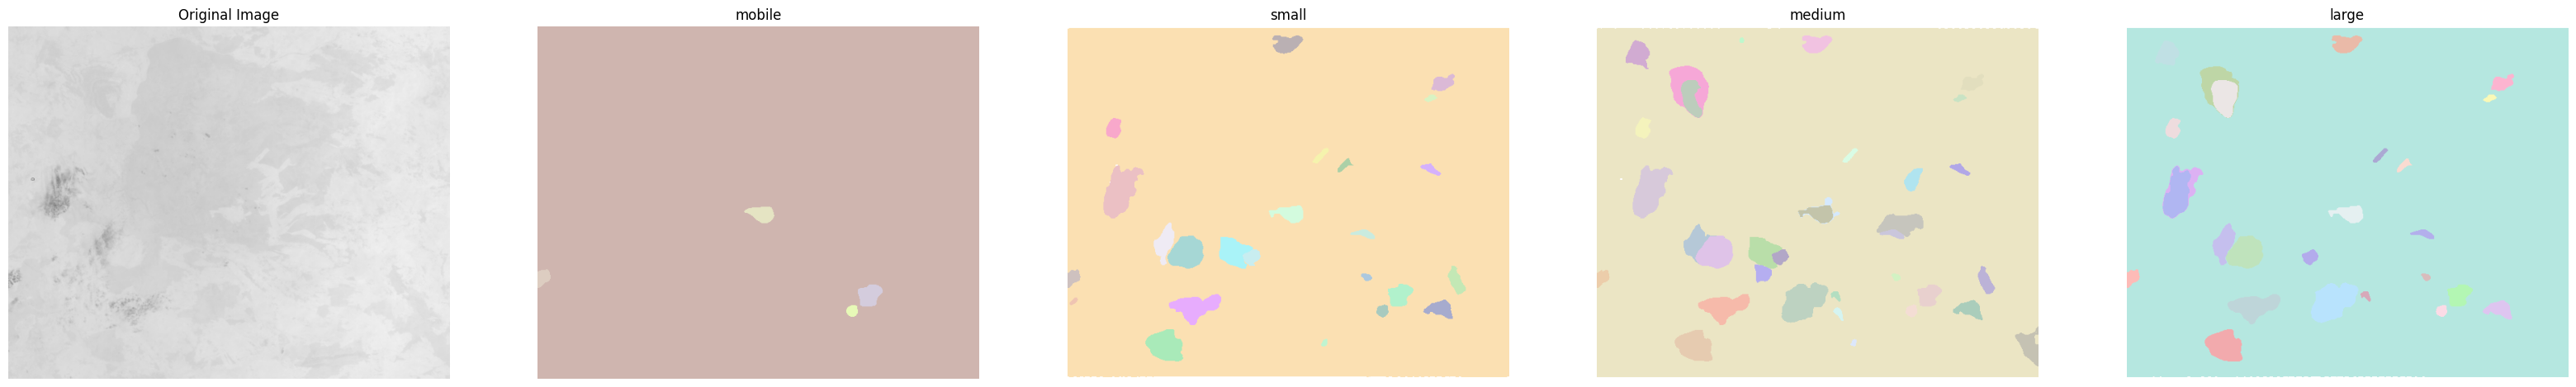

tests/sim_15_subframes\frame_0512.png


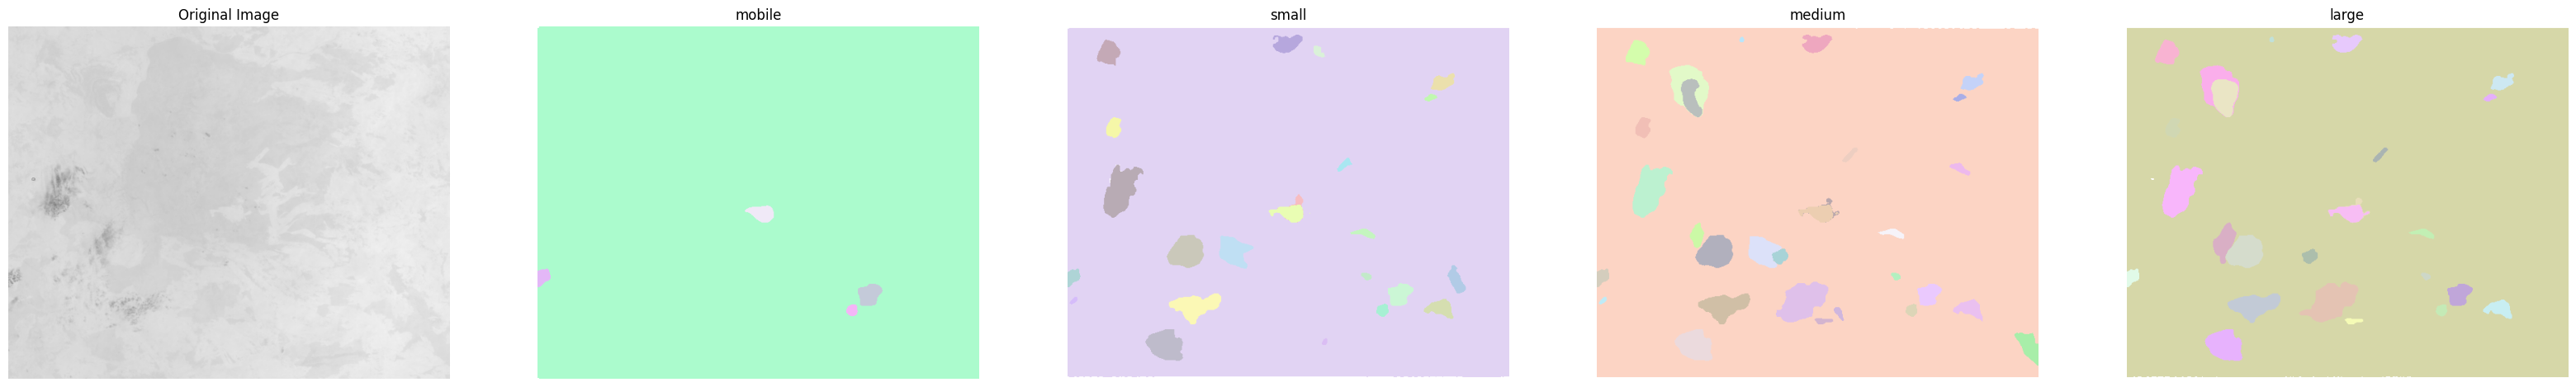

tests/sim_15_subframes\frame_0513.png


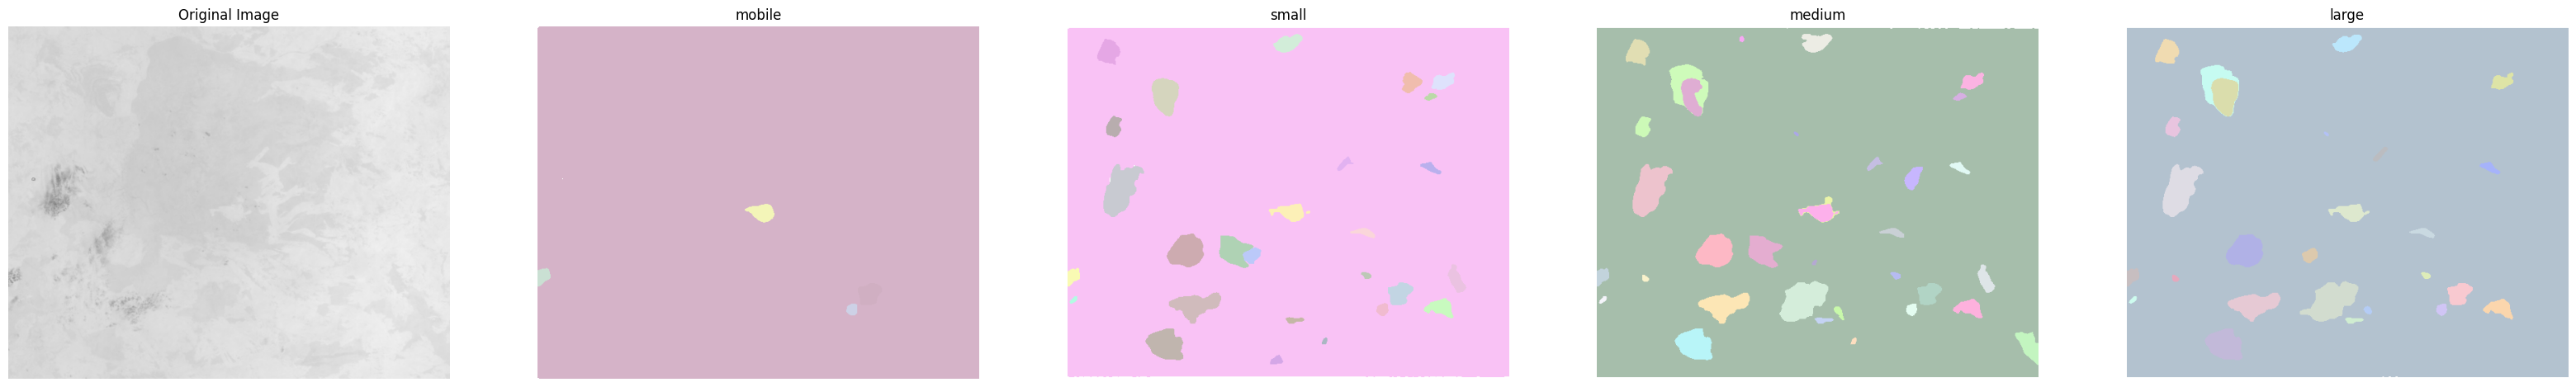

tests/sim_15_subframes\frame_0514.png


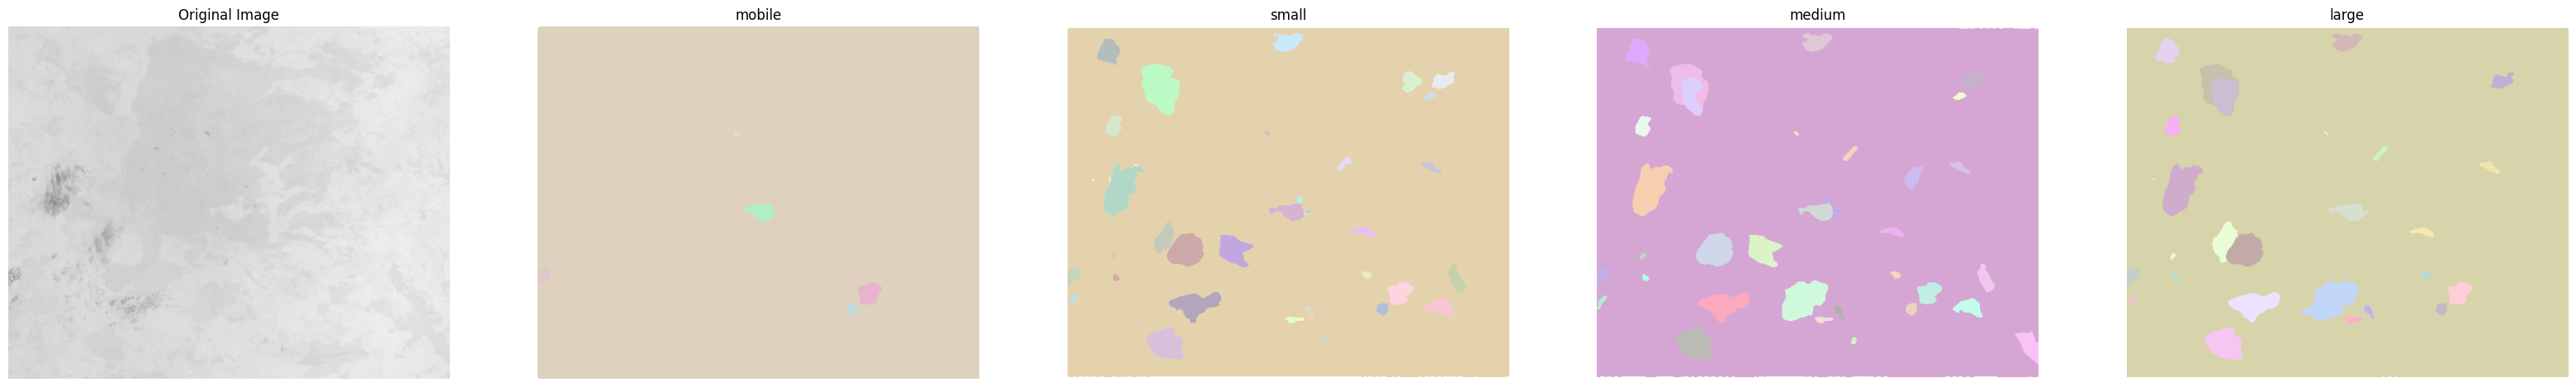

tests/sim_15_subframes\frame_0515.png


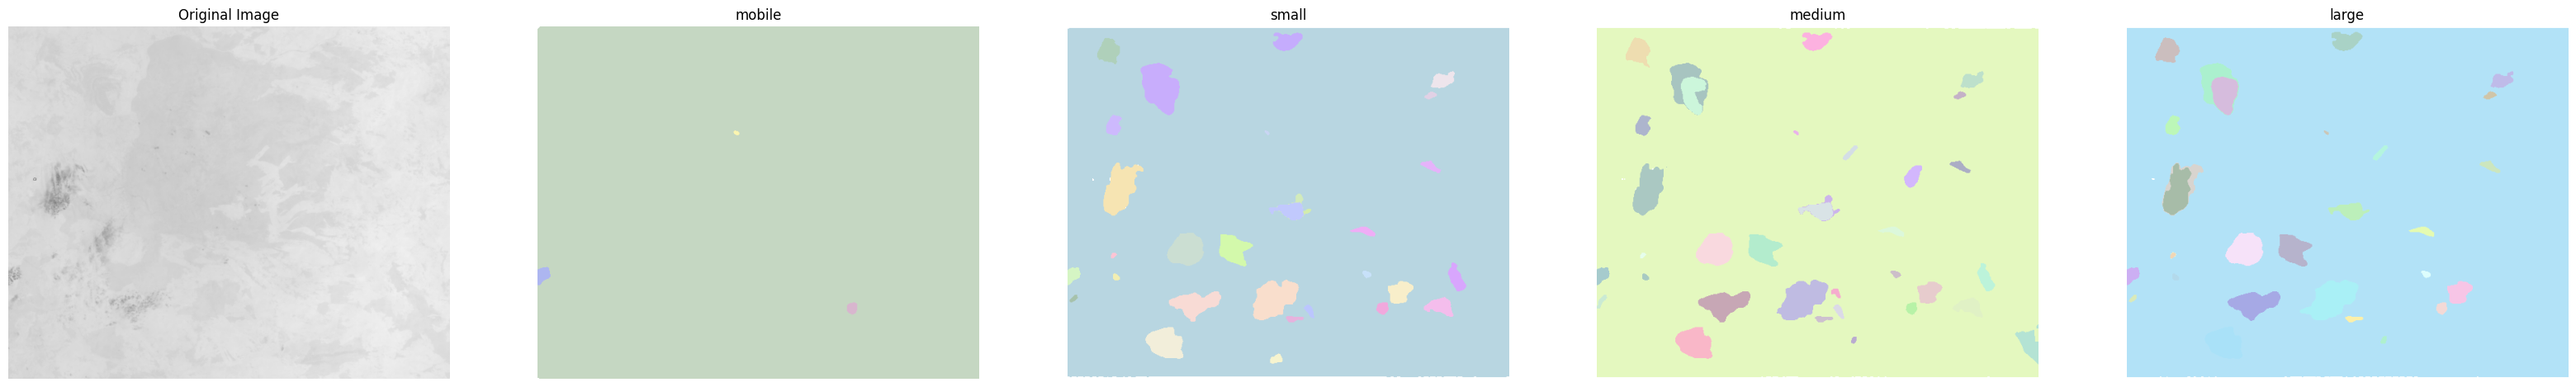

tests/sim_15_subframes\frame_0516.png


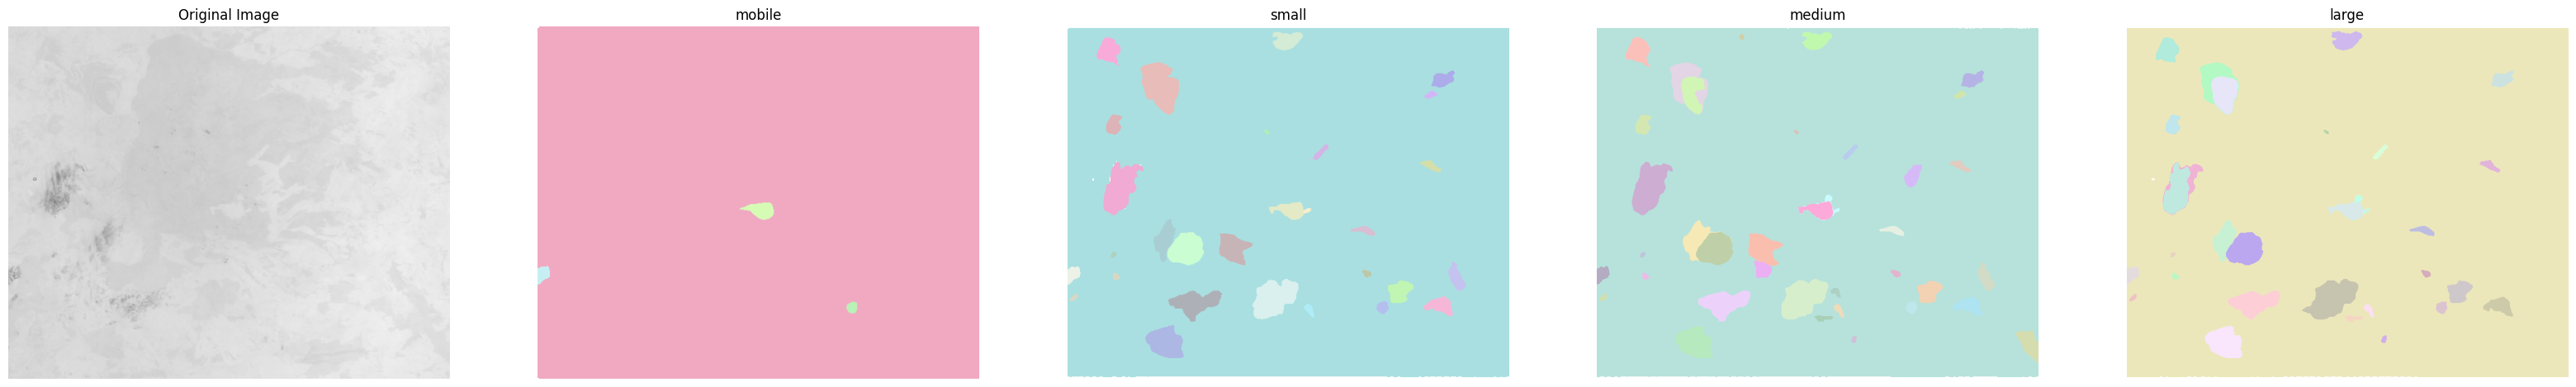

tests/sim_15_subframes\frame_0517.png


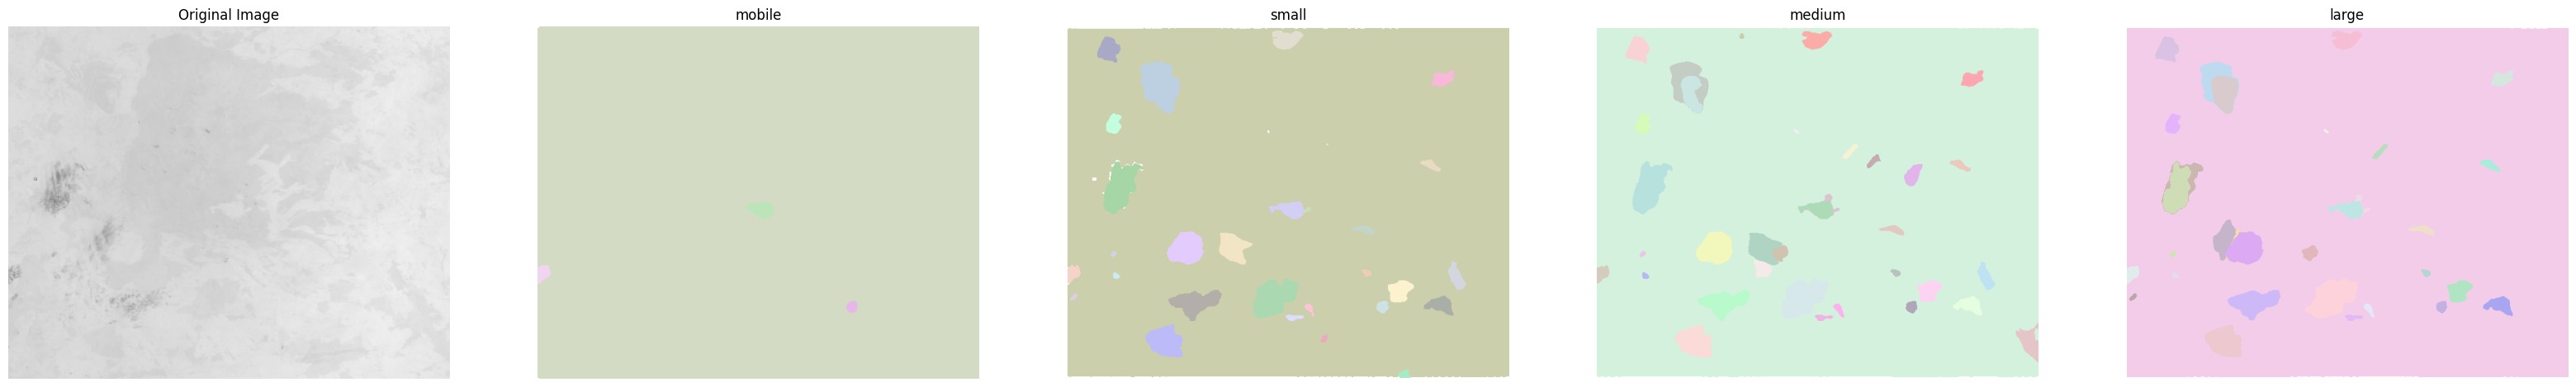

tests/sim_15_subframes\frame_0518.png


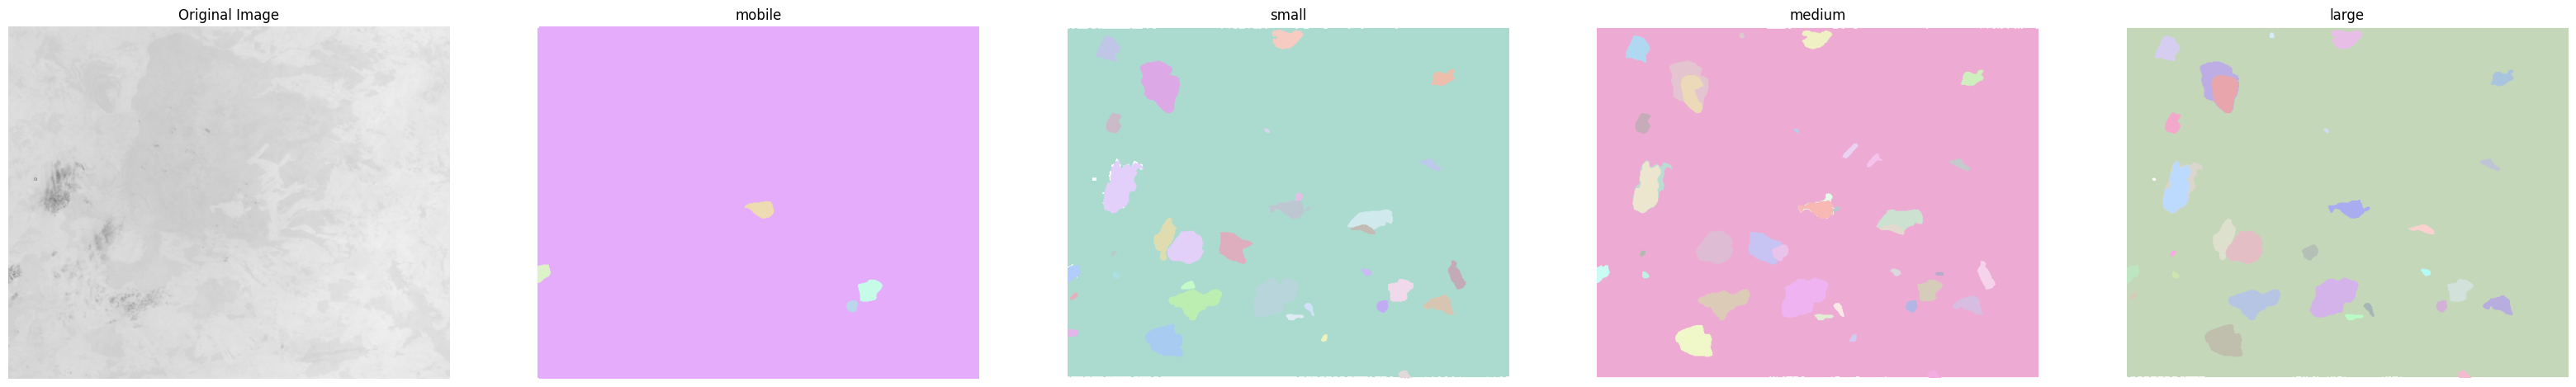

tests/sim_15_subframes\frame_0519.png


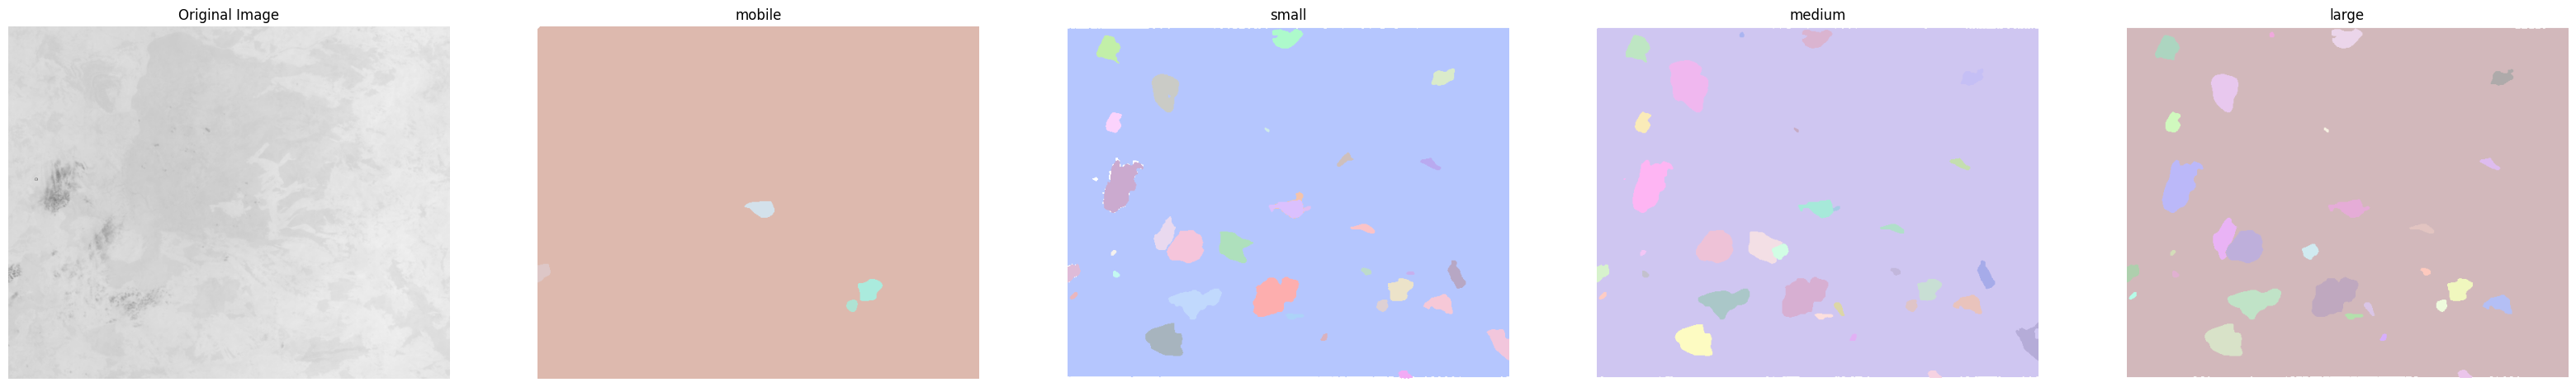

tests/sim_15_subframes\frame_0520.png


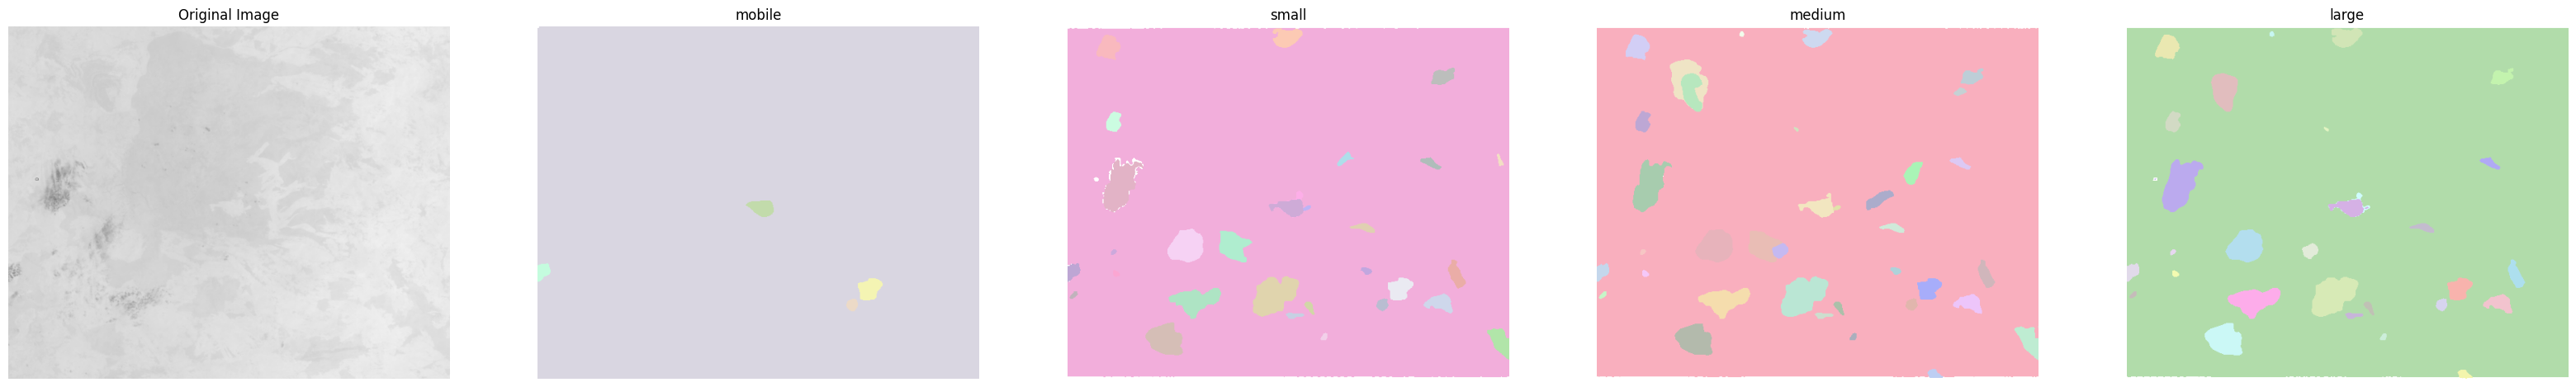

In [13]:
visualizing = \
    {
        'mobile': True,
        'small': True,
        'medium': True,
        'large': True
    }

for file_path in images.keys():
    print(file_path)
    
    overlays = []
    for model_size, is_visualizing in visualizing.items():
        if is_visualizing:
            if model_size == 'mobile':
                overlays.append(overlays_mobile[file_path])
            elif model_size == 'small':
                overlays.append(overlays_small[file_path])
            elif model_size == 'medium':
                overlays.append(overlays_medium[file_path])
            elif model_size == 'large':
                overlays.append(overlays_large[file_path])
            
    
    visualize(overlays, 
              list(visualizing.keys()),
              images[file_path], 
              figsize=(40, 10))